In [3]:
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd

from utils import extract_gene_symbol

In [4]:
def tsnescatterplot_geneset(model, genes, title = ""):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    vecs = []
    labels = []
    for gene in genes:
        sym = extract_gene_symbol(gene)
        if sym!= gene:
            vecs.append(model[gene])
            labels.append(sym)
    arrays = np.vstack(vecs)

    # Reduces the dimensionality from 100 to 20 dimensions with PCA
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(arrays)
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': labels,
                        })
    
    fig, _ = plt.subplots()
    fig.set_size_inches(6, 6)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40}
                    )
        # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE Plot for {}'.format(title))

In [5]:
import pandas as pd
import numpy as np
from utils import load_embedding, cosine
from gensim.models import KeyedVectors
from time import time

t = time()
w2v_cbow_pt = load_embedding("./WordVectors/Computed/word2vec_cbow.bin", binary=True)
print('Time to load cbow embeddings: {} seconds'.format(round(time() - t,2)))

t = time()
w2v_sg_pt = load_embedding("./WordVectors/Computed/word2vec_skipgram.bin", binary=True)
print('Time to load cbow embeddings: {} seconds'.format(round(time() - t,2)))


embedding loaded from ./WordVectors/Computed/word2vec_cbow.bin
Time to load cbow embeddings: 0.19 seconds
embedding loaded from ./WordVectors/Computed/word2vec_skipgram.bin
Time to load cbow embeddings: 0.17 seconds


c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


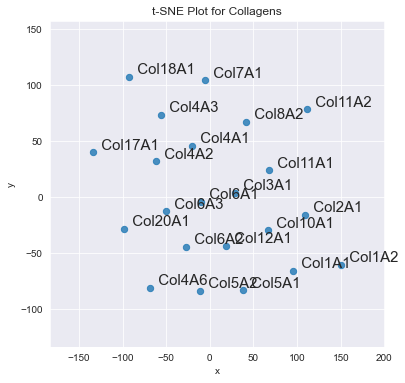

In [7]:
# plot collagens 
model = w2v_cbow_pt
with open("./GeneLists/collagen_genes.txt", 'r') as f:
        target_genes = f.readlines()
target_genes = [gene.strip() for gene in target_genes]
vocab = list(model.key_to_index)
genes = np.intersect1d(target_genes, vocab)
tsnescatterplot_geneset(w2v_cbow_pt, genes, "Collagens")

c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


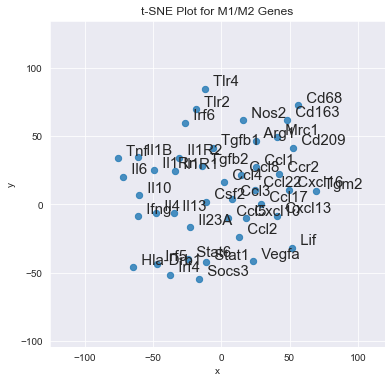

In [8]:
model = w2v_cbow_pt
with open("./GeneLists/m1m2_genes.txt", 'r') as f:
        target_genes = f.readlines()
target_genes = [gene.strip() for gene in target_genes]
vocab = list(model.key_to_index)
genes = np.intersect1d(target_genes, vocab)
tsnescatterplot_geneset(w2v_cbow_pt, genes, "M1/M2 Genes")

In [6]:
def tsnescatterplot_pos_neg(model, query_keys, pos_keys, neg_keys, title = ""):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    vecs = []
    labels = []
    colors = []
    legends = ["query","most_similar","least_similar"]
    for key in query_keys:
        vecs.append(model[key])
        labels.append(key)
        colors.append("red")
        #legends.append("query")
    for key in pos_keys:
        sym = extract_gene_symbol(key)
        if sym!= key:
            vecs.append(model[key])
            labels.append(sym)
            colors.append("blue")
            #legends.append("most similar")
    for key in neg_keys:
        sym = extract_gene_symbol(key)
        if sym!= key:
            vecs.append(model[key])
            labels.append(sym)
            colors.append("green")
            #legends.append("least similar")
    arrays = np.vstack(vecs)

    # Reduces the dimensionality from 100 to 20 dimensions with PCA
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(arrays)
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': labels,
                       'colors':colors,
                        })
    
    fig, _ = plt.subplots()
    fig.set_size_inches(6, 6)
    
    # Basic plot
    p1 = sns.regplot(data=df.iloc[0:len(query_keys),:],
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,'facecolors': df.iloc[0:len(query_keys),3]}
                    )
        # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 color=df['colors'][line],
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 weight='normal'
                ).set_size(15)

    p2 = sns.regplot(data=df.iloc[len(query_keys):len(query_keys) + len(pos_keys),:],
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,'facecolors': df.iloc[len(query_keys):len(query_keys) + len(pos_keys),3]}
                    )

    p3 = sns.regplot(data=df.iloc[len(query_keys) + len(pos_keys): len(neg_keys) + len(query_keys) + len(pos_keys),:],
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,'facecolors': df.iloc[len(query_keys) + len(pos_keys): len(neg_keys) + len(query_keys) + len(pos_keys),3]}
                    )

    plt.legend(labels=legends)


    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    
            
    plt.title('t-SNE Plot for {}'.format(title))


def most_similar_to_given(model, query_keys, keys_list, topn = 10):
    vocab = list(model.index_to_key)
    tuples = [(i,word) for i,word in enumerate(vocab) if word in keys_list]
    inds = [i[0] for i in tuples]
    words = [w[1] for w in tuples]
    pos_sims = model.most_similar(positive=query_keys, topn=None)
    pos_sims = pos_sims[inds]
    neg_sims = model.most_similar(negative=query_keys, topn=None)
    neg_sims = neg_sims[inds]
    pos_inds = np.argsort(- pos_sims)[0:min(len(inds),topn)]
    neg_inds = np.argsort(- neg_sims)[0:min(len(inds),topn)]
    keys_list = np.array(keys_list)
    return keys_list[pos_inds], keys_list[neg_inds]
    


In [16]:
#### find all muscle reg most iportant to wound healing
model = w2v_cbow_pt
with open("./GeneLists/muscle_regeneration_genes.txt", 'r') as f:
    target_genes = f.readlines()
target_genes = [gene.strip() for gene in target_genes]
vocab = list(model.key_to_index)
target_genes = np.intersect1d(target_genes, vocab)
target_genes = [gene for gene in target_genes if extract_gene_symbol(gene) != gene]
symbols = [extract_gene_symbol(gene) for gene in target_genes]

pos_genes, neg_genes = most_similar_to_given(model, ["healing","regeneration"], target_genes, topn=5)

['Gene_5081' 'Gene_8650' 'Gene_657' 'Gene_114131' 'Gene_5467']
['Gene_6497' 'Gene_4654' 'Gene_154' 'Gene_4656' 'Gene_831']


c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


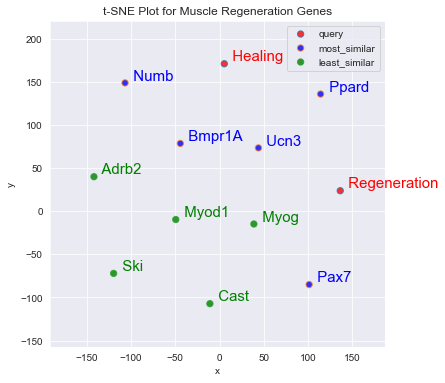

In [17]:
print(pos_genes)
print(neg_genes)
tsnescatterplot_pos_neg(model, query_keys=["healing","regeneration"], pos_keys=pos_genes, neg_keys= neg_genes, title = "Muscle Regeneration Genes")

['Gene_3586' 'Gene_3627' 'Gene_3569' 'Gene_6346' 'Gene_3553']
['Gene_7097' 'Gene_3662' 'Gene_6351' 'Gene_7422' 'Gene_7850']


c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


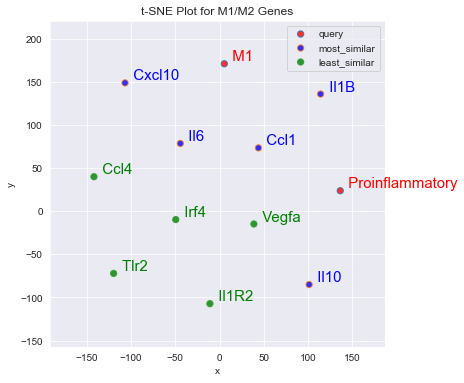

In [9]:
model = w2v_cbow_pt
with open("./GeneLists/m1m2_genes.txt", 'r') as f:
    target_genes = f.readlines()
target_genes = [gene.strip() for gene in target_genes]
vocab = list(model.key_to_index)
target_genes = np.intersect1d(target_genes, vocab)
target_genes = [gene for gene in target_genes if extract_gene_symbol(gene) != gene]
symbols = [extract_gene_symbol(gene) for gene in target_genes]

pos_genes, neg_genes = most_similar_to_given(model, ["m1","proinflammatory"], target_genes, topn=5)

print(pos_genes)
print(neg_genes)
tsnescatterplot_pos_neg(model, query_keys=["m1","proinflammatory"], pos_keys=pos_genes, neg_keys= neg_genes, title = "M1/M2 Genes")

In [18]:
model = w2v_sg_pt
with open("./GeneLists/muscle_regeneration_genes.txt", 'r') as f:
    target_genes = f.readlines()
target_genes = [gene.strip() for gene in target_genes]
pos_genes = model.most_similar(["m1","m2"], topn=100)
pos_genes = [token[0] for token in pos_genes if token[0].startswith("Gene_")]

['Gene_2840', 'Gene_17533', 'Gene_4360', 'Gene_12655', 'Gene_9332', 'Gene_4481', 'Gene_11846', 'Gene_10461', 'Gene_729230', 'Gene_29221', 'Gene_93671', 'Gene_312701', 'Gene_6358', 'Gene_287673', 'Gene_135', 'Gene_23765', 'Gene_719', 'Gene_1436', 'Gene_146433', 'Gene_59340', 'Gene_6176', 'Gene_9173', 'Gene_57823', 'Gene_131450', 'Gene_64581', 'Gene_22414_22422_22409', 'Gene_54209', 'Gene_1524', 'Gene_338773', 'Gene_383']


c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jaj146\Projects\Spring 22\DM Pitt\Final_Project_1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


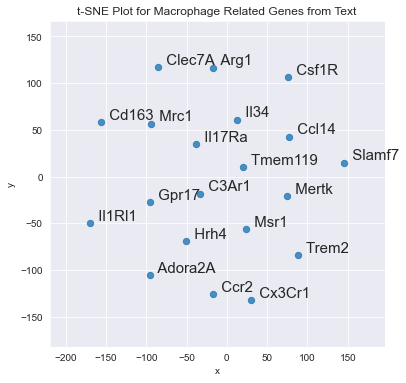

In [19]:
print(pos_genes)
tsnescatterplot_geneset(model, pos_genes, "Macrophage Related Genes from Text")